In [213]:
import numpy as np
import pickle
from facenet_models import FacenetModel
import skimage.io as io
from camera import take_picture
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from utils import cos_distance

In [214]:
class Profile:
    def __init__(self, name):
        self.name = name
        self.descriptors = []
        self.mean_descriptor = 0
        
    def add_descriptor(self, descriptor):
        self.descriptors.append(descriptor)
        self.mean_descriptor = np.mean(self.descriptors, axis=0)

In [228]:
# from profile import Profile

class Database:
     
    # initialize database
    def __init__(self):
        self.database = {}
        self.model = FacenetModel()
        
    # add image descriptor to profile, or create profile if it doesn't exist    
    def add_image(self, name, img):
        if img.shape[-1] > 4000 or img.shape[-2] > 4000:
            img = img[::4, ::4]
        boxes, probabilities, landmarks = self.model.detect(img)
        idxs = []
        for prob in probabilities:
            if prob >= 0.98:
                idxs.append(np.where(probabilities == prob)[0])
        descriptor = self.model.compute_descriptors(img, boxes[idxs])
        if descriptor.shape[0] == 1:
            if name in self.database:
                self.database[name].add_descriptor(descriptor)
            else:
                profile = Profile(name)
                profile.add_descriptor(descriptor)
                self.database[name] = profile
            self.save_database()
     
    def remove_profile(self, name):
        self.database.pop(name)
        
    def load_database(self):
        with open("./database.pkl", mode="rb") as db:
            self.database = pickle.load(db)
            
    def save_database(self):
        with open("./database.pkl", mode="wb") as db:
            pickle.dump(self.database, db)
            
    def create_database(self):
        self.database = {}
        
    # compare input to mean descriptors in database         
    def find_match(self, descriptor):
        cutoff = 0.6
        dists = []
        names = []
        for name, value in self.database.items():
            dists.append(cos_distance(value.mean_descriptor, descriptor))
            names.append(name)
        if np.min(dists) < cutoff:
            print(names[np.argmin(dists)])
            print(len(self.database[names[np.argmin(dists)]].descriptors))
            self.database[names[np.argmin(dists)]].add_descriptor(descriptor)
            print(len(self.database[names[np.argmin(dists)]].descriptors))
            return names[np.argmin(dists)]
        return "Unknown??"

In [229]:
def cos_distance(descriptor_1, descriptor_2):
    return 1 - descriptor_1 @ descriptor_2 / (np.linalg.norm(descriptor_1) * np.linalg.norm(descriptor_2))

In [230]:
# turn png/jpeg file into np array
def upload_picture(file_path):
    image = io.imread(file_path)
    if image.shape[-1] == 4:
    # Image is RGBA, where A is alpha -> transparency
    # Must make image RGB.
        image = image[..., :-1]  # png -> RGB
    return image

In [231]:
db = Database()
db.load_database()
print(db.database)

{'Dharshini': <__main__.Profile object at 0x000002461552F8B0>, 'Hyojae': <__main__.Profile object at 0x000002460CD5F700>, 'Joseph': <__main__.Profile object at 0x000002460CD5F6D0>, 'Jacob': <__main__.Profile object at 0x000002460CD5FF70>, 'Kathryn': <__main__.Profile object at 0x000002460CD5FF10>, 'Angelina': <__main__.Profile object at 0x000002460CD5FEE0>}


In [168]:
db = Database()
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_1.png"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_2.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_3.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_4.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_5.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Hyojae_1.png"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_2.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_3.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_4.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_5.jpg"))
db.add_image("Joseph", upload_picture(r"C:\Users\Hello\Desktop\Joseph_1.png"))
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_1.jpg"))
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_1.png"))


<ipython-input-165-5bc4db1c783d>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


In [169]:
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_2.jpg"))
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_3.jpg"))


<ipython-input-165-5bc4db1c783d>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


In [170]:
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_4.jpeg"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Kathryn_1.png"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Kathryn_2.jpg"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Kathryn_3.jpg"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Kathryn_4.jpg"))

<ipython-input-165-5bc4db1c783d>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


In [234]:
# plot image and label faces
def detect_faces(image):
    model = FacenetModel()
    boxes, probabilities, landmarks = model.detect(image)
    descriptor = model.compute_descriptors(image, boxes)

    fig, ax = plt.subplots()
    ax.imshow(image)

    for des, box, prob, landmark in zip(descriptor, boxes, probabilities, landmarks):
        # draw the box on the screen
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
    
        # Get the landmarks/parts for the face in box d.
        # Draw the face landmarks on the screen.
        #for i in range(len(landmark)):
            #ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")
        
        # add name labels to each box
        plt.text(box[:2][0],box[:2][1], db.find_match(des),color="white")

In [173]:
# db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_6.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_7.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_8.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_9.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_10.png"))

<ipython-input-165-5bc4db1c783d>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


In [235]:
detect_faces(upload_picture(r"C:\Users\Hello\Desktop\group pic.png"))

<IPython.core.display.Javascript object>

AttributeError: 'Figure' object has no attribute 'imshow'

In [205]:
db.remove_profile("Angelina")

[array([0], dtype=int64)]


<ipython-input-196-919729d3423d>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]
[array([0], dtype=int64)]


<IPython.core.display.Javascript object>


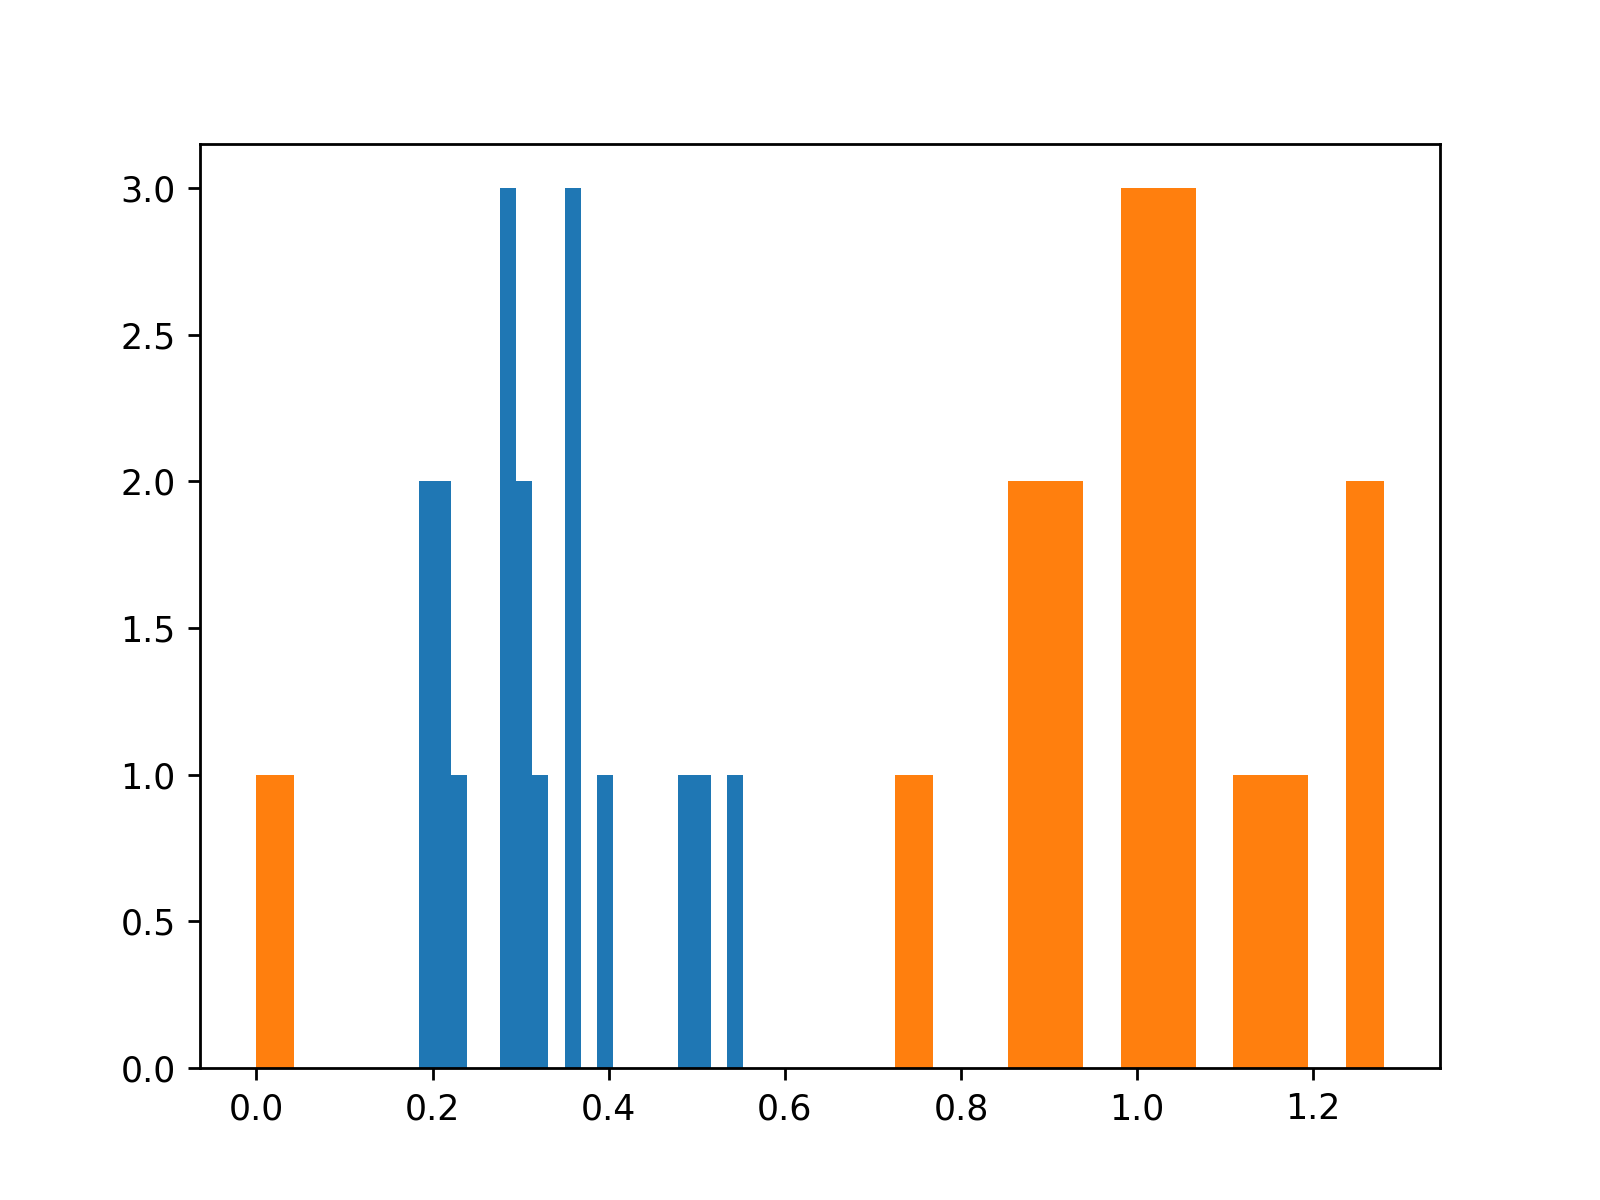

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 2., 2., 0., 3., 3., 0., 1., 1., 0., 2.]),
 array([-1.19209290e-07,  4.26627517e-02,  8.53256226e-02,  1.27988493e-01,
         1.70651364e-01,  2.13314235e-01,  2.55977106e-01,  2.98639977e-01,
         3.41302848e-01,  3.83965719e-01,  4.26628590e-01,  4.69291461e-01,
         5.11954331e-01,  5.54617202e-01,  5.97280073e-01,  6.39942944e-01,
         6.82605815e-01,  7.25268686e-01,  7.67931557e-01,  8.10594428e-01,
         8.53257298e-01,  8.95920169e-01,  9.38583040e-01,  9.81245911e-01,
         1.02390878e+00,  1.06657165e+00,  1.10923452e+00,  1.15189739e+00,
         1.19456027e+00,  1.23722314e+00,  1.27988601e+00]),
 <BarContainer object of 30 artists>)

In [206]:
similar_distances = []
negative_distances = []
images = [r"C:\Users\Hello\Desktop\random_1.jpeg",
          r"C:\Users\Hello\Desktop\random_2.jpeg",
          r"C:\Users\Hello\Desktop\random_3.jpeg",
          r"C:\Users\Hello\Desktop\random_4.jpeg",
          r"C:\Users\Hello\Desktop\random_5.jpeg",
          r"C:\Users\Hello\Desktop\random_6.jpeg",
          r"C:\Users\Hello\Desktop\random_7.jpeg",
          r"C:\Users\Hello\Desktop\random_8.jpeg",
          r"C:\Users\Hello\Desktop\random_9.jpeg",
          r"C:\Users\Hello\Desktop\random_10.jpeg",]

model = FacenetModel()

db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_1.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_2.jpeg"))
# db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_3.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_4.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_5.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_6.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_7.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_8.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_9.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_10.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_11.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_12.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_13.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_14.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_15.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_16.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_17.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_18.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_19.jpeg"))
db.add_image("Angelina", upload_picture(r"C:\Users\Hello\Desktop\angelina_20.jpeg"))

descriptors = db.database["Angelina"].descriptors
control = descriptors[0]

for descriptor in descriptors:
    similar_distances.append(cos_distance(descriptor.reshape(512), control.reshape(512)))
    
for value in db.database.values():
    negative_distances.append(cos_distance(control.reshape(512), value.descriptors[0].reshape(512)))

for img in images:
    image = upload_picture(img)
    boxes, probabilities, landmarks = model.detect(image)
    descriptor = model.compute_descriptors(image, boxes)
    negative_distances.append(cos_distance(control.reshape(512), descriptor.reshape(512)))

fig, ax = plt.subplots()
ax.hist(similar_distances, 30)
ax.hist(negative_distances, 30)